<a href="https://colab.research.google.com/github/chiranjeev9292/Twowaits_Technology/blob/main/Crypto_currency_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Author : Chiranjeev Sharma**

**Task -To predict the price of etherium**


Objective - To predict the price of etherium  for fututre after 14 days (Traning Set).

Dataset URL : "https://drive.google.com/file/d/1zxNPbfzK_YLQWkEekNaGZpLOxaNl84IC/view"

# *Import Libraries*

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#*Loading the Dataset*

In [20]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [23]:
df = pd.read_csv("/content/drive/MyDrive/Crypto_currency_price_prediction/ETH_1H.csv")
df.head(10)

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622
5,1586977200000,2020-04-15 19:00:00,ETHUSD,157.78,157.84,157.10,157.10,329.356201
6,1586973600000,2020-04-15 18:00:00,ETHUSD,157.48,158.20,157.48,157.78,520.137463
7,1586970000000,2020-04-15 17:00:00,ETHUSD,157.12,157.78,156.90,157.48,156.552221
8,1586966400000,2020-04-15 16:00:00,ETHUSD,155.81,157.52,155.74,157.12,430.083035
9,1586962800000,2020-04-15 15:00:00,ETHUSD,157.12,157.15,155.81,155.81,303.839541


# *Data Cleaning*

Checking how many missing values are there in dataset(Handling Missing Values)

In [24]:
df.isna().sum()

Unix Timestamp    0
Date              0
Symbol            0
Open              0
High              0
Low               0
Close             0
Volume            0
dtype: int64

Descriptive analysis of dataset(Using Descibe Function)

In [25]:
df.describe()

,Unix Timestamp,Open,High,Low,Close,Volume
count,3.449700e+04,34497.000000,34497.000000,34497.000000,34497.000000,34497.000000
mean,7.147761e+11,239.172160,240.988877,237.142926,239.176415,1563.625471
std,7.758756e+11,237.205512,239.468230,234.532649,237.202348,7003.461234
min,1.462799e+09,0.000000,6.150000,0.000000,6.100000,0.000000
25%,1.493845e+09,81.020000,82.120000,79.980000,81.020000,101.092334
50%,1.524892e+09,181.870000,182.770000,180.820000,181.870000,444.684817
75%,1.555938e+12,298.070000,299.920000,296.380000,298.070000,1508.711881
max,1.586995e+12,1417.540000,1420.010000,1388.990000,1417.540000,903102.685700



Infromation about Data (Using info Function)

In [26]:
df.info

<bound method DataFrame.info of        Unix Timestamp                 Date  Symbol  ...     Low   Close       Volume
0       1586995200000  2020-04-16 00:00:00  ETHUSD  ...  150.39  150.39   650.188125
1       1586991600000  2020-04-15 23:00:00  ETHUSD  ...  151.39  152.94  4277.567299
2       1586988000000  2020-04-15 22:00:00  ETHUSD  ...  155.32  155.81   106.337279
3       1586984400000  2020-04-15 21:00:00  ETHUSD  ...  157.16  157.18    55.244131
4       1586980800000  2020-04-15 20:00:00  ETHUSD  ...  156.87  158.04   144.262622
...               ...                  ...     ...  ...     ...     ...          ...
34492      1462813200  2016-05-09 17:00:00  ETHUSD  ...    9.48    9.49   329.553213
34493      1462809600  2016-05-09 16:00:00  ETHUSD  ...    9.79    9.83    62.379450
34494      1462806000  2016-05-09 15:00:00  ETHUSD  ...    9.99    9.99    10.973567
34495      1462802400  2016-05-09 14:00:00  ETHUSD  ...    9.55   10.00   235.774075
34496      1462798800  2016-05-09

# *Data Preprocessing and Logic Implementation.*

In [27]:
# Variable for number of days to predict for future.
projection =14

# create a new column named prediction
df['Prediction'] = df[['Close']].shift(-projection)
df

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,Prediction
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125,157.69
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299,159.05
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279,158.77
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131,159.84
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622,160.21
...,...,...,...,...,...,...,...,...,...
34492,1462813200,2016-05-09 17:00:00,ETHUSD,9.83,9.83,9.48,9.49,329.553213,NaN
34493,1462809600,2016-05-09 16:00:00,ETHUSD,9.99,9.99,9.79,9.83,62.379450,NaN
34494,1462806000,2016-05-09 15:00:00,ETHUSD,10.00,10.00,9.99,9.99,10.973567,NaN
34495,1462802400,2016-05-09 14:00:00,ETHUSD,9.55,10.00,9.55,10.00,235.774075,NaN


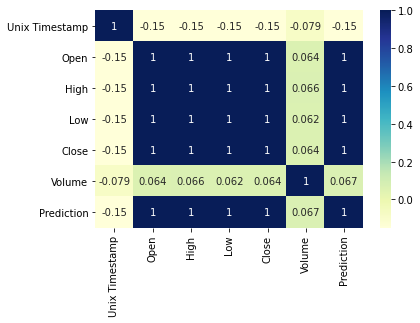

In [30]:
sns.heatmap(df.corr(), annot = True,cmap= 'YlGnBu')

Create array because we cannot apply machine learning on list, Tuple and Dataframe.

In [33]:
# Create independent dataset (x)
x = np.array(df[['Close']])
x = x[:-projection]
print(x)

[[150.39]
 [152.94]
 [155.81]
 ...
 [  9.36]
 [  9.36]
 [  9.36]]


In [34]:
y = df['Prediction'].values
y = y[:-projection]
print(y)

[157.69 159.05 158.77 ...   9.99  10.     9.55]


# *Splitting and visualizing Data*

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .20)

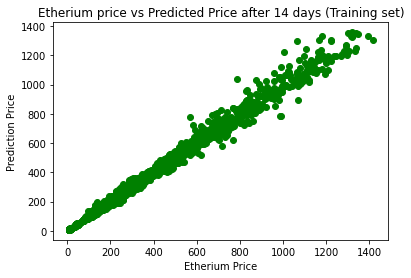

In [50]:
# ploting the distribution of price
plt.scatter(x_test, y_test, color = "green")

# Add title to figure
plt.title("Etherium price vs Predicted Price after 14 days (Training set)")

# Add Label for horzontal & Vertical Axis
plt.xlabel("Etherium Price")
plt.ylabel("Prediction Price")
plt.show()

# *Model Building and testing*

## Linear Regression

In [51]:
regressor=LinearRegression()

# Train the model
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
# Test the model using score
regressor_confidense = regressor.score(x_test, y_test)
print("Linear Regressioin Confidense :", regressor_confidense)

Linear Regressioin Confidense : 0.9946922672972002


In [53]:
regressor_prediction = regressor.predict(x_test)
print(regressor_prediction)

[270.70391262  13.55122635 261.12281432 ... 181.70948184  50.82768693
 224.91424699]


In [54]:
y_test

array([274.34,  13.05, 257.1 , ..., 162.47,  52.15, 211.66])

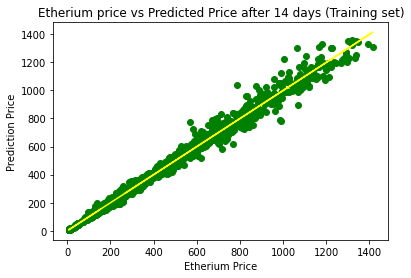

In [55]:
# ploting the distribution of price
plt.scatter(x_test, y_test, color = "green")

# Ploting line in scattered figure
plt.plot(x_train, regressor.predict(x_train), color = "yellow")

# Add title to figure
plt.title("Etherium price vs Predicted Price after 14 days (Training set)")

# Add Label for horzontal & Vertical Axis
plt.xlabel("Etherium Price")
plt.ylabel("Prediction Price")
plt.show()

# *Saving Model and Loading Model

In [56]:
import pickle

# Save the model to disk
filename = 'ether_predictor.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [57]:
# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9946922672972002


In [59]:
loaded_model.predict(x_test)

array([270.70391262,  13.55122635, 261.12281432, ..., 181.70948184,
        50.82768693, 224.91424699])